# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.stats import t

df = pd.read_csv('data/human_body_temperature.csv')

# Question 1

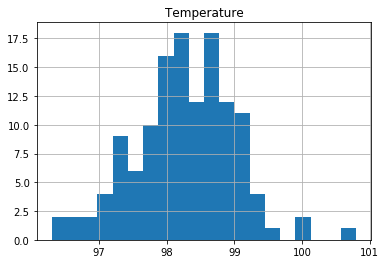

Number of observations: 130
Shapiro-Wilk: (0.9865769743919373, 0.2331680953502655)
Plotting the histogram, computing Shapiro-Wilk, and observing that N = 130 suggest that body temperatures are normally distributed


In [2]:
# Your work here.

df['temperature'].hist(bins=20)
plt.title('Temperature')
plt.show()

print('Number of observations: {}'.format(df.shape[0]))
print('Shapiro-Wilk:', shapiro(df['temperature']))
print('Plotting the histogram, computing Shapiro-Wilk, and observing that N = 130 suggest that body temperatures are \
normally distributed')

# Question 2

In [3]:
print('N = 130 > 30, hence the sample size is large')
print("It's not likely that one's body temperature would affect others', hence the observations are independent")

N = 130 > 30, hence the sample size is large
It's not likely that one's body temperature would affect others', hence the observations are independent


# Question 3 - bootstrap

In [4]:
# the below code is from DataCamp: https://www.datacamp.com/courses/statistical-thinking-in-python-part-2

print('null: the true population mean is NOT 98.6 degrees')
print('alternative: the true population mean IS 98.6 degrees')

temp_shifted = df['temperature'] - df['temperature'].mean() + 98.6

def diff_from_98(data, true_mean=98.6):
    return np.mean(data) - true_mean

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

bs_replicates = draw_bs_reps(temp_shifted, diff_from_98, 10000)

p_value = np.sum(bs_replicates <= diff_from_98(df['temperature'])) #/ 10000

print('The p_value is: {0:.4f}, hence we reject the null in favor of the alternative'.format(p_value))

null: the true population mean is NOT 98.6 degrees
alternative: the true population mean IS 98.6 degrees
The p_value is: 0.0000, hence we reject the null in favor of the alternative


# Question 3 - frequentist

In [5]:
print('Use a one-sample z-test: the observations are homogeneous (that is, the observations are not stratified, \
by, say, gender) and N = 130 > 30')

n = df['temperature'].count()

X = df['temperature'].mean()
mu = 98.6
sigma = df['temperature'].std() / np.sqrt(n)

Z = (X - mu) / sigma

print('\nWe have a Z-stat of {0:.2f} and a p-value of {1:.4f}, hence reject the null'.format(Z, norm.cdf(Z)))

print('\nNow try t-test')

sigma_ttest = sigma

tstat = (X - mu) / sigma_ttest

print('\nThe t-stat is {0:.2f} and the p-value is {1:.4f}'.format(tstat, t.cdf(tstat, n-1)))

print('\nThere would not be an appreciable difference in terms of statistical significance of the test statistic if a \
t-test were used instead of a z-test because at 130 - 1 = 129 degrees of freedom, such t-distribution would behave very \
similarly to a normal distribution')

Use a one-sample z-test: the observations are homogeneous (that is, the observations are not stratified, by, say, gender) and N = 130 > 30

We have a Z-stat of -5.45 and a p-value of 0.0000, hence reject the null

Now try t-test

The t-stat is -5.45 and the p-value is 0.0000

There would not be an appreciable difference in terms of statistical significance of the test statistic if a t-test were used instead of a z-test because at 130 - 1 = 129 degrees of freedom, such t-distribution would behave very similarly to a normal distribution


# Question 4

In [6]:
###### ensure reproducibility

np.random.seed(1)

###### one-sample test: random sample of size 10 drawn from df['temperature']

n = 10

x = np.random.choice(df['temperature'], n)
x_mu = x.mean()
x_sigma = x.std() / np.sqrt(n)
x_var = x.var() / n
mu = 98.6

t_stat = (x_mu - mu) / x_sigma

print('For the one-sample test, we have a t-stat of {0:.2f}'.format(t_stat))

###### two-sample test: random sample of size 10 versus the entire df['temperature'], which is of size 130

mu_130 = df['temperature'].mean()
var_130 = df['temperature'].var()

t_stat_two = ((mu_130 - x_mu) - 0) / np.sqrt(var_130 / df['temperature'].count() + x_var)

print('\nThe two-sample t-stat is: {0:.2f} and the p-value is: {1:.4f}'.format(t_stat_two, t.cdf(t_stat_two, n-1)))

######

print("\nWe're looking to see if the true population mean is 98.6 degrees, not to see if two samples' means are different, \
so the correct test to use is the one-sample test")

print('\nGiven n = 10 < 30, the appropriate test to use is the t-test')

print('\nt-distributions have fatter tails than those of the normal distribution, allowing for a greater probability of rare \
events and hence less statistical significance, but the smaller the sample size, the greater the variability in terms of \
the computed test statistic')

For the one-sample test, we have a t-stat of -2.50

The two-sample t-stat is: -0.14 and the p-value is: 0.4453

We're looking to see if the true population mean is 98.6 degrees, not to see if two samples' means are different, so the correct test to use is the one-sample test

Given n = 10 < 30, the appropriate test to use is the t-test

t-distributions have fatter tails than those of the normal distribution, allowing for a greater probability of rare events and hence less statistical significance, but the smaller the sample size, the greater the variability in terms of the computed test statistic


# Question 5 - bootstrap

In [7]:
def pctiles2point5(data):
    return np.percentile(data, 2.5)

def pctiles97point5(data):
    return np.percentile(data, 97.5)

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

bs_replicates_2point5 = draw_bs_reps(df['temperature'], pctiles2point5, 10000)
bs_replicates_97point5 = draw_bs_reps(df['temperature'], pctiles97point5, 10000)

print('We deem "abnormal" to be any temperature that falls outside of the 2.5 or 97.5 percentile')
print('\nThe 2.5th and 97.5th percentiles via bootstrapping is: {0:.2f}, {1:.2f}'.format(bs_replicates_2point5.mean(), \
                                                                             bs_replicates_97point5.mean()))
print('\nThe actual 2.5th and 97.5th percentiles are:', np.percentile(df['temperature'], [2.5, 97.5]))

We deem "abnormal" to be any temperature that falls outside of the 2.5 or 97.5 percentile

The 2.5th and 97.5th percentiles via bootstrapping is: 96.76, 99.58

The actual 2.5th and 97.5th percentiles are: [96.7225 99.4775]


# Question 5 - frequentist

In [8]:
# X-bar +/- 1.96 * sigma

xbar = df['temperature'].mean()
sig = df['temperature'].std()

CI = (xbar - 1.96 * sig, xbar + 1.96 * sig)

print("We denote via 95% confidence interval the range within which the true mean temperature lies, and by extension the \
range of temperatures that are deemed \"normal\"")
print('\nThe 95% confidence interval for the true average temperature is: ({0:.2f}, {1:.2f})'.format(CI[0], CI[1]))

We denote via 95% confidence interval the range within which the true mean temperature lies, and by extension the range of temperatures that are deemed "normal"

The 95% confidence interval for the true average temperature is: (96.81, 99.69)


# Question 6

In [9]:
# get males

males = df[df['gender'] == 'M']['temperature']

males_mu = males.mean()
males_var = males.var() / len(males)

# get females

females = df[df['gender'] == 'F']['temperature']

females_mu = females.mean()
females_var = females.var() / len(females)

# compute t-stat

male_female_min = min(len(males), len(females))

t_male_female = ((females_mu - males_mu) - 0) / np.sqrt(males_var + females_var)

print('Exploit the difference-of-means test by subsetting temperatures by gender')
print('\nThe t-stat for the mean difference between male and female temperatures is: {0:.2f}'.format(t_male_female))
print('\nThe p-value is: {0:.4f}'.format(1-t.cdf(t_male_female, male_female_min-1)))
print('\nGiven the low p-value, we conclude that there is a significant difference between male and female temperatures')
print('\nConsistent with the standard test employed for difference of means, I opted for the t-test')

Exploit the difference-of-means test by subsetting temperatures by gender

The t-stat for the mean difference between male and female temperatures is: 2.29

The p-value is: 0.0128

Given the low p-value, we conclude that there is a significant difference between male and female temperatures

Consistent with the standard test employed for difference of means, I opted for the t-test
